# **Importar estas cuatro librerias**

In [1]:
# Importar las librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# importar datos
datos = pd.read_excel("/content/drive/MyDrive/Python - Google Colaboratory/Curso - Estadística Industrial/datos/datos_empresa.xlsx")
#datos = pd.read_excel("datos_empresa.xlsx")
datos.head()

,Genero,Estrato,Proceso,Experiencia,Rendimiento,Salario
0,Hombre,Baja,Operativo,2,94,1720000.0
1,Mujer,Media,Operativo,2,83,2160000.0
2,Hombre,Alta,Operativo,3,82,1738000.0
3,Mujer,Baja,Operativo,5,62,2634400.0
4,Hombre,Media,Administrativo,2,79,2637200.0


# **Gráfica de Barras**

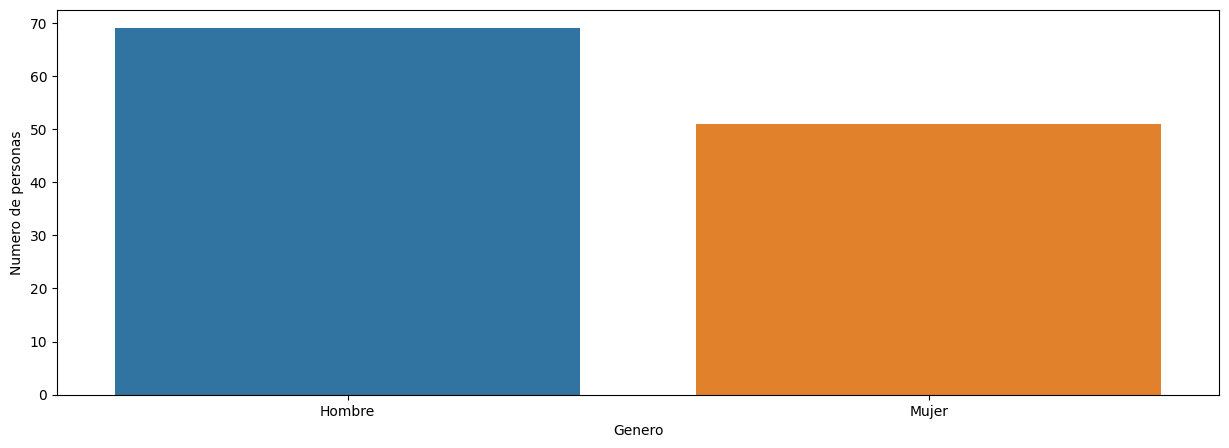

In [3]:
#Indicar variable que quiere gráficar
variable = "Genero"
unidad = "Numero de personas"

#Gráfico de barras básico con 1 variable
plt.figure(figsize=(15,5))  #Tamaño de imagen
sns.countplot(x=variable,data=datos)
plt.xlabel(variable) #Titulo de eje X
plt.ylabel(unidad) #Titulo de eje Y
plt.show() #Mostrar el gráfico

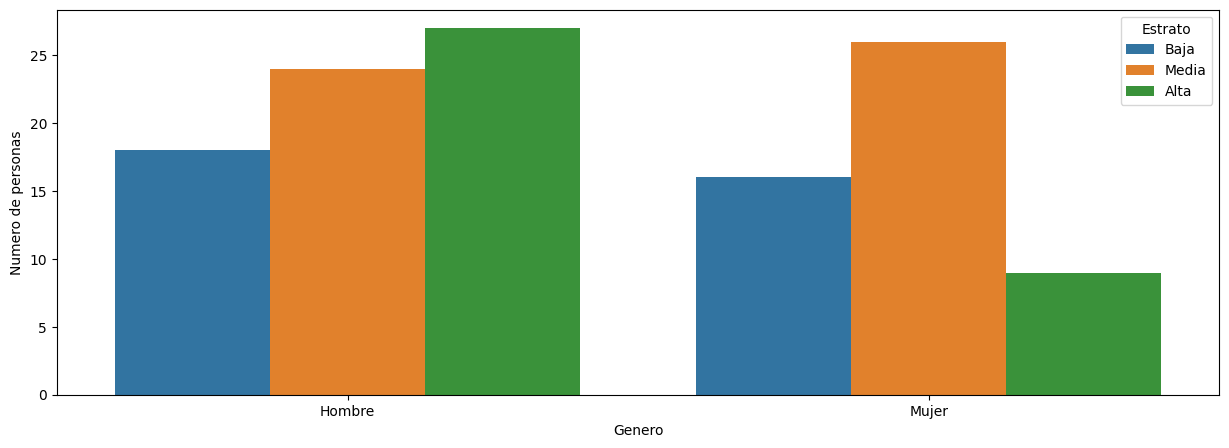

In [4]:
#Indicar cuales son las variables
variable = "Genero"
subdivision = "Estrato"
unidad = "Numero de personas"

#Gráfico de barras comparativo con dos variables
plt.figure(figsize=(15,5))  #Tamaño de imagen
sns.countplot(x=variable, hue= subdivision,data=datos)
plt.xlabel(variable) #Titulo de eje X
plt.ylabel(unidad) #Titulo de eje Y
plt.show() #Mostrar el gráfico

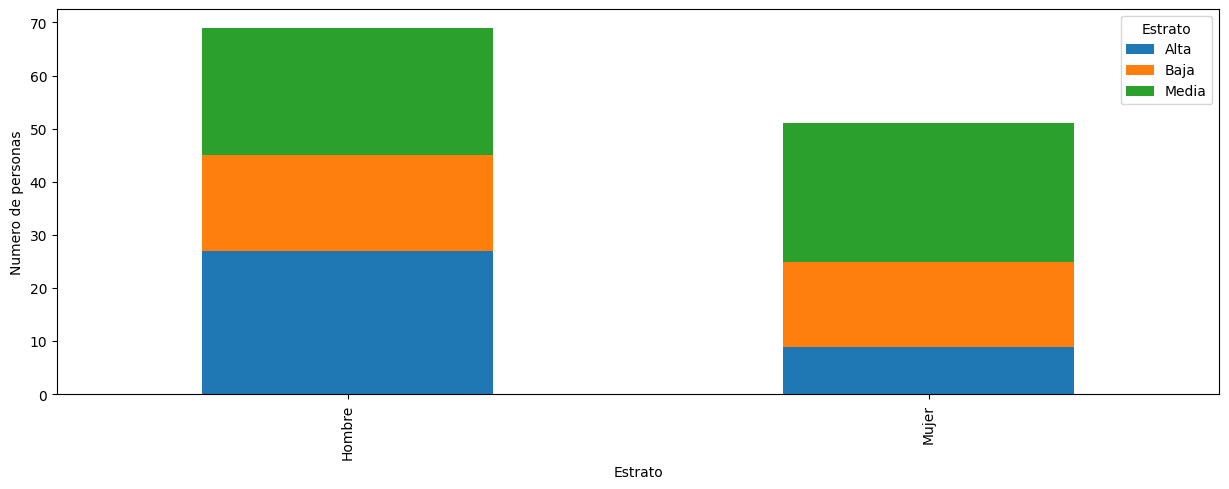

In [5]:
#Indicar cuales son las variables
variable = "Genero"
subdivision = "Estrato"
unidad = "Numero de personas"

# Crea la gráfica de barras apiladas
grouped_data = datos.groupby([variable, subdivision])[variable].count().unstack()
grouped_data.plot(kind='bar', stacked=True, figsize=(15,5))
plt.xlabel(subdivision) #Titulo de eje X
plt.ylabel(unidad) #Titulo de eje y
plt.show() #Mostrar el gráfico

<ipython-input-6-0d49cbd9e221>:8: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ax, (col_name, col_data) in zip(axes, categorical_data.iteritems()):


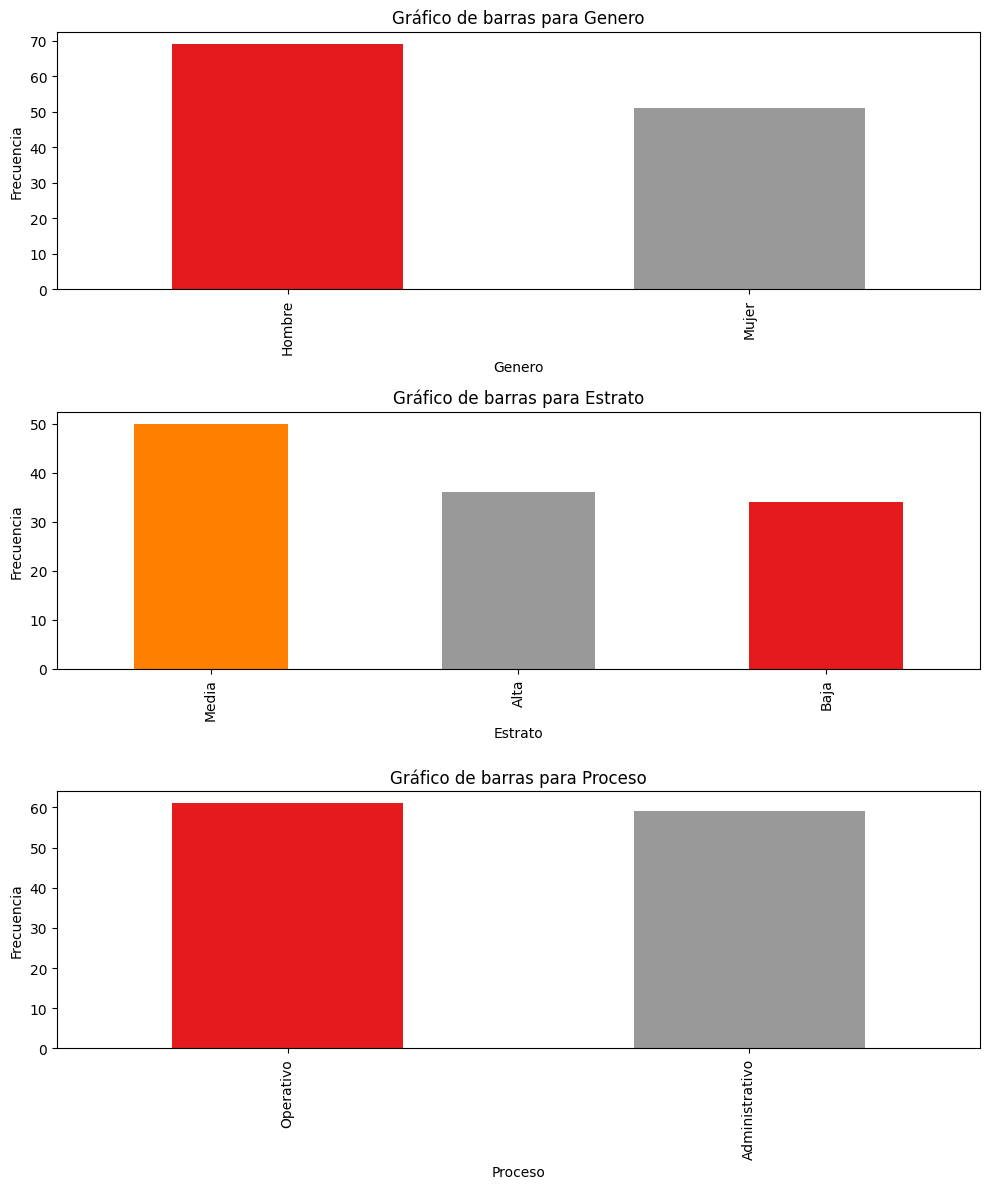

In [6]:
# Seleccionar variables categóricas
categorical_data = datos.select_dtypes(include=['object'])
# Crear subplots para gráficos de barras de las variables categóricas
n_cats = len(categorical_data.columns)
# sin leyendas, sin líneas de cuadrícula interna y manteniendo el recuadro
fig, axes = plt.subplots(nrows=n_cats, figsize=(10, 4 * n_cats))

for ax, (col_name, col_data) in zip(axes, categorical_data.iteritems()):
    unique_values = col_data.dropna().unique()
    colors = plt.cm.Set1(np.linspace(0, 1, len(unique_values)))
    color_mapping = dict(zip(unique_values, colors))
    col_data.value_counts().plot(kind='bar', ax=ax, color=[color_mapping[val] for val in col_data.value_counts().index])
    ax.set_title(f'Gráfico de barras para {col_name}')
    ax.set_xlabel(col_name)
    ax.set_ylabel('Frecuencia')
    ax.grid(False)  # Desactivar la cuadrícula

plt.tight_layout()
plt.show()

# **Gráfica de Torta**

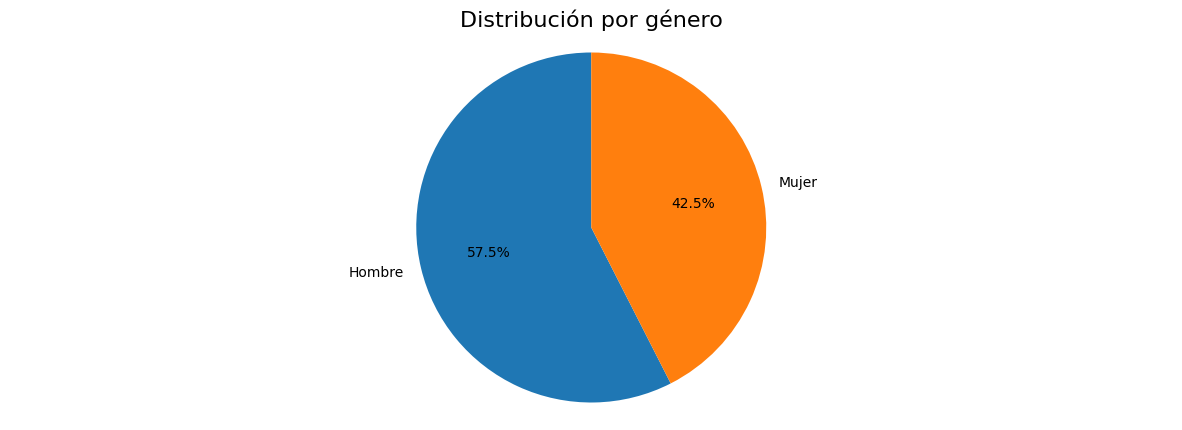

In [7]:
#Indicar cuales son las variables
variable = "Genero"
nombre_grafica = "Distribución por género"

# Agrupa los datos por la variable 'Genero' y cuenta cuántos elementos hay en cada grupo
plt.figure(figsize=(15,5))  #Tamaño de imagen
genero_counts = datos.groupby(variable).size() #agrupar por variable de interes
plt.pie(genero_counts, labels=genero_counts.index, autopct='%1.1f%%', startangle=90) #Generar gráfico
plt.axis('equal') #centrar el gráfico
plt.title(nombre_grafica, fontsize=16) #titulo
plt.show() #mostrar el gráfico

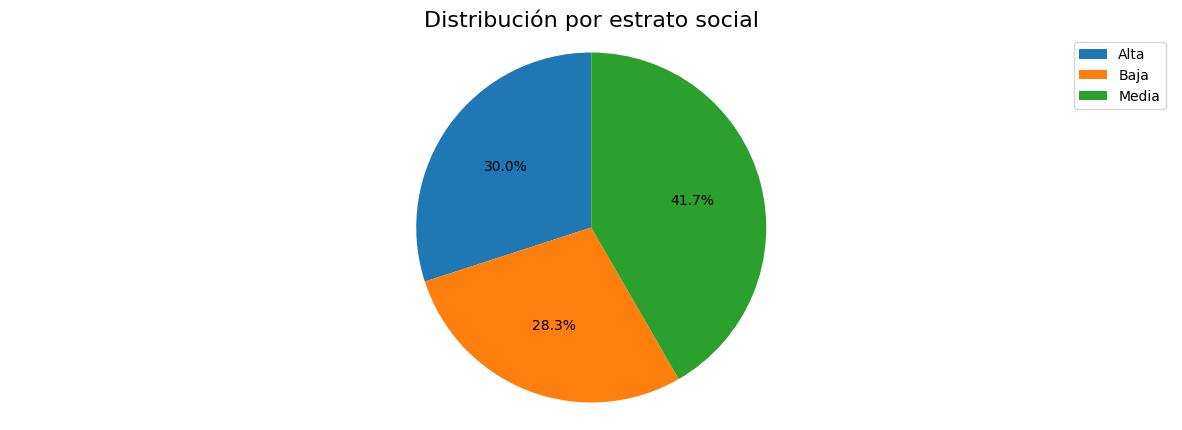

In [8]:
#Indicar cuales son las variables
variable = "Estrato"
nombre_grafica = "Distribución por estrato social"

# Agrupa los datos por la variable 'Genero' y cuenta cuántos elementos hay en cada grupo
plt.figure(figsize=(15,5)) #Tamaño
genero_counts = datos.groupby(variable).size() #Agrupar datos según variable
plt.pie(genero_counts, autopct='%1.1f%%', startangle=90) #Generar gráfico
plt.title(nombre_grafica, fontsize=16) # Titulo
plt.legend(labels=genero_counts.index) #Leyenda
plt.axis('equal')
plt.show()

#**Gráfica de Dispersión**

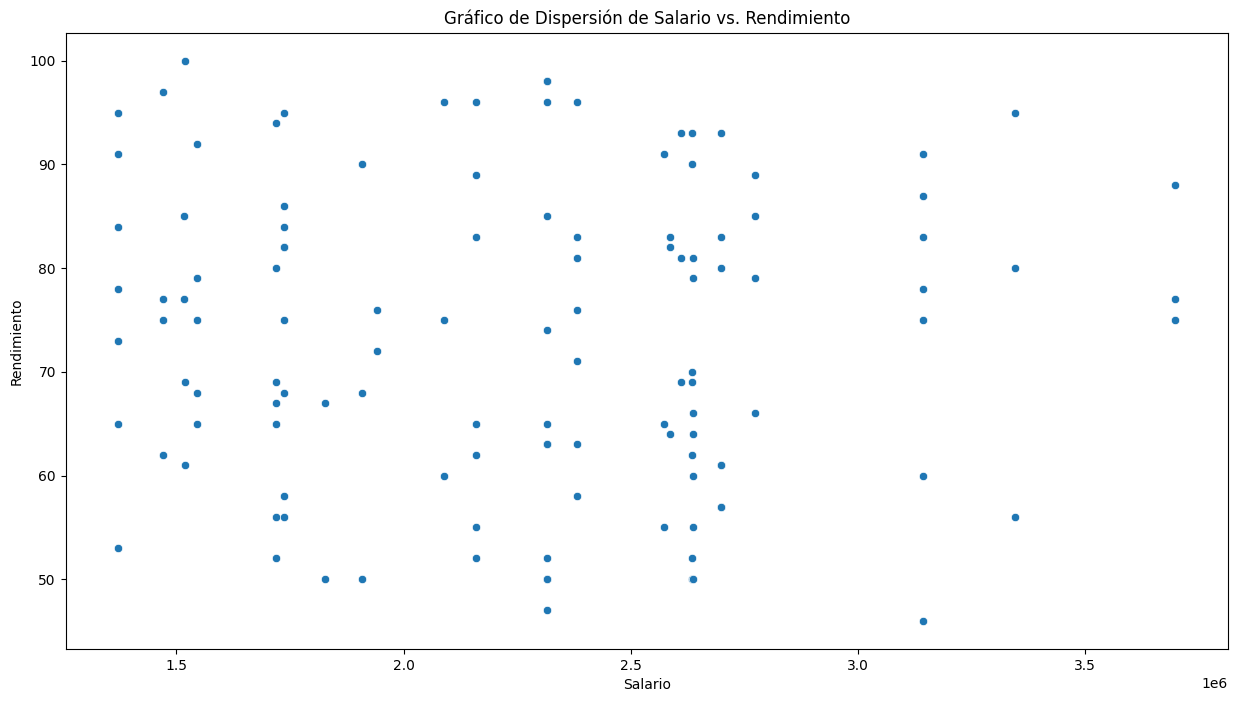

In [9]:
#Indicar cuales son las variables
variable_x = "Salario"
variable_y = "Rendimiento"
nombre_grafica = "Gráfico de Dispersión de Salario vs. Rendimiento"

#Gráfico de dispersión básico de  2 variables
plt.figure(figsize=(15,8)) #Tamaño
sns.scatterplot(data=datos, x=variable_x, y=variable_y) #generar gráficos según variables
plt.title(nombre_grafica) #Titulo
plt.xlabel(variable_x) # Eje x
plt.ylabel(variable_y) # Eje y
plt.show() # mostrar

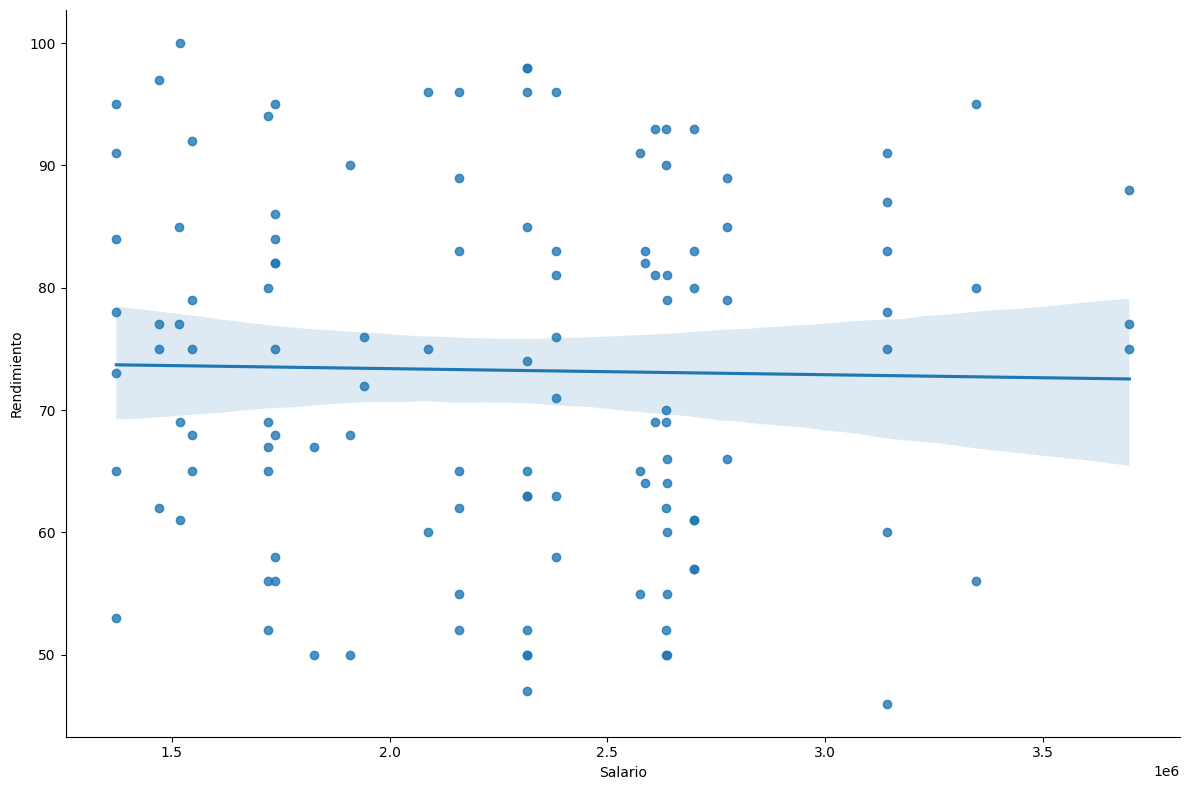

In [10]:
#Indicar cuales son las variables
variable_x = "Salario"
variable_y = "Rendimiento"

#Gráfico de dispersión 2 variables con centralidad
sns.lmplot(x=variable_x, y=variable_y, data =datos, height=8, aspect=1.5) # Gráfico según variables
plt.show()

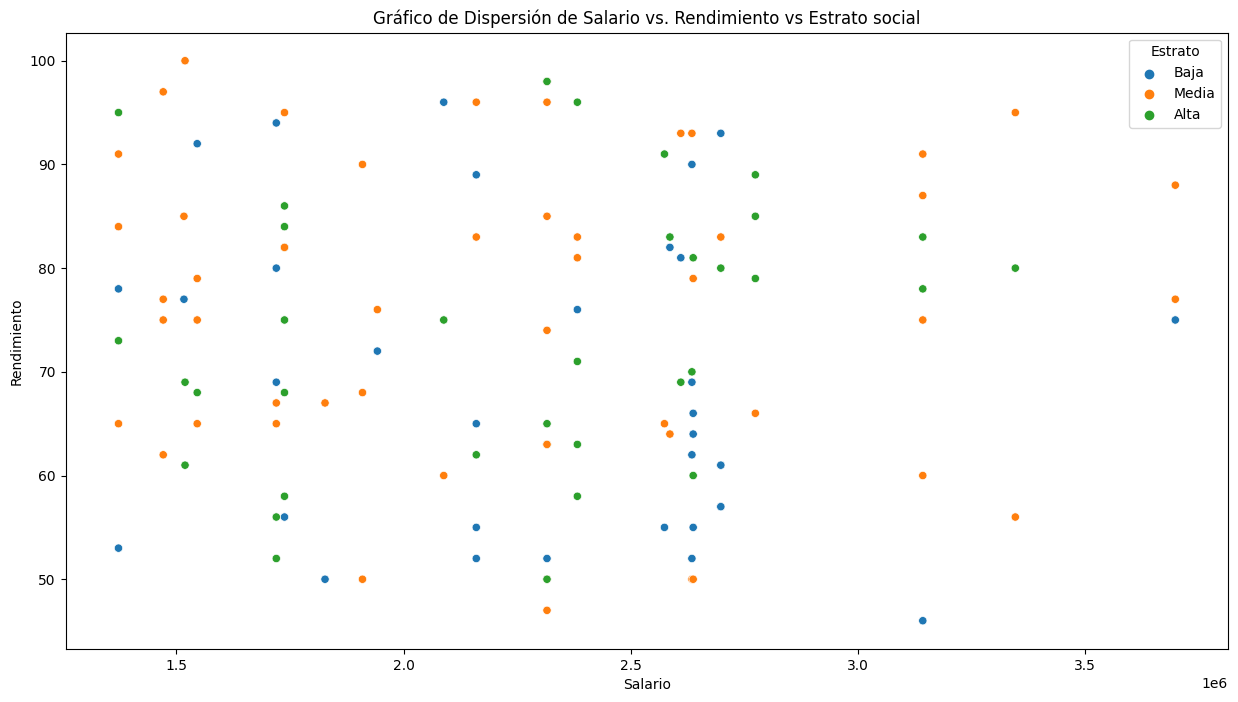

In [11]:
#Indicar cuales son las variables
variable_x = "Salario"
variable_y = "Rendimiento"
subdivision = "Estrato"
nombre_grafica = "Gráfico de Dispersión de Salario vs. Rendimiento vs Estrato social"

# Gráfico de dispersión de 3 variables (2 numéricas y 1 categorica)
plt.figure(figsize=(15,8)) # Tamaño
sns.scatterplot(data=datos, x=variable_x, y=variable_y, hue=subdivision) # Generar gráfica según variables
plt.title(nombre_grafica) #Titulo
plt.xlabel(variable_x) #Eje x
plt.ylabel(variable_y) #Eje y
plt.show() #Mostrar

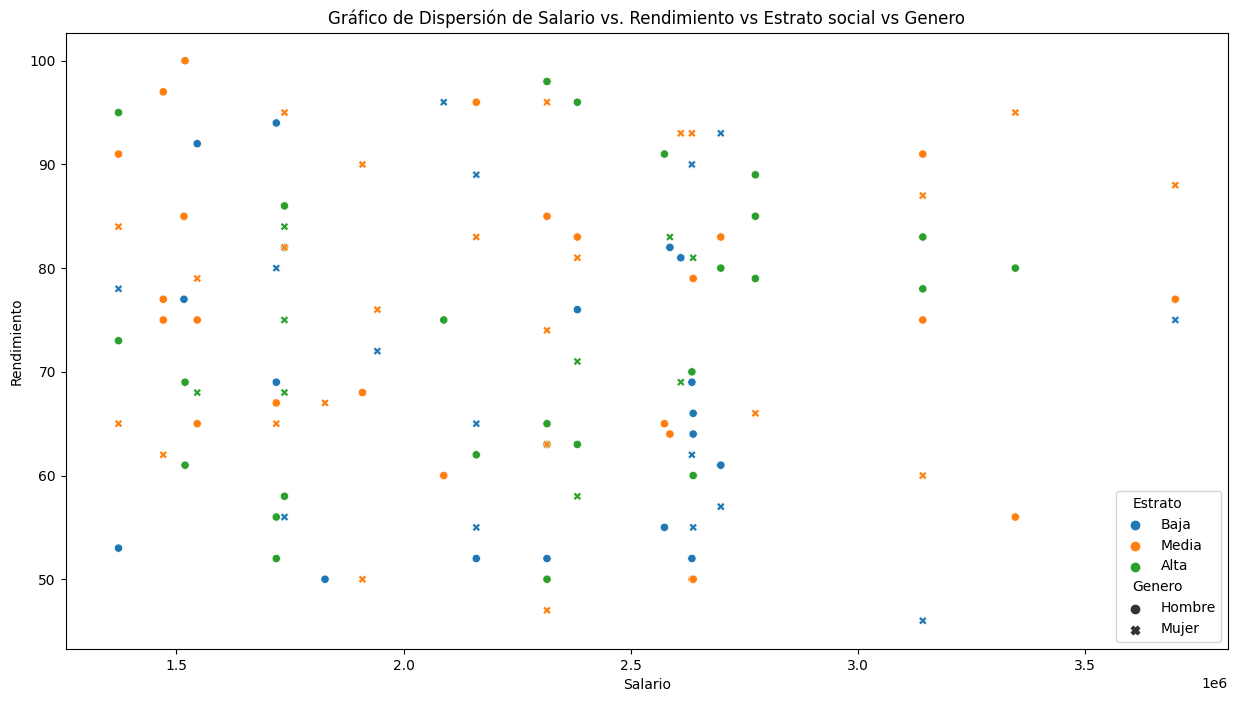

In [12]:
#Indicar cuales son las variables
variable_x = "Salario"
variable_y = "Rendimiento"
subdivision1 = "Estrato"
subdivision2 = "Genero"
nombre_grafica = "Gráfico de Dispersión de Salario vs. Rendimiento vs Estrato social vs Genero"

# Gráfico de dispersión de 3 variables (2 numéricas y 2 categorica)
plt.figure(figsize=(15,8)) #Tamaño
sns.scatterplot(data=datos, x=variable_x, y=variable_y, hue=subdivision1, style=subdivision2) #Generar según variable
plt.title(nombre_grafica) # titutlo
plt.xlabel(variable_x) #Eje X
plt.ylabel(variable_y) #Eje y
plt.show() #mostrar

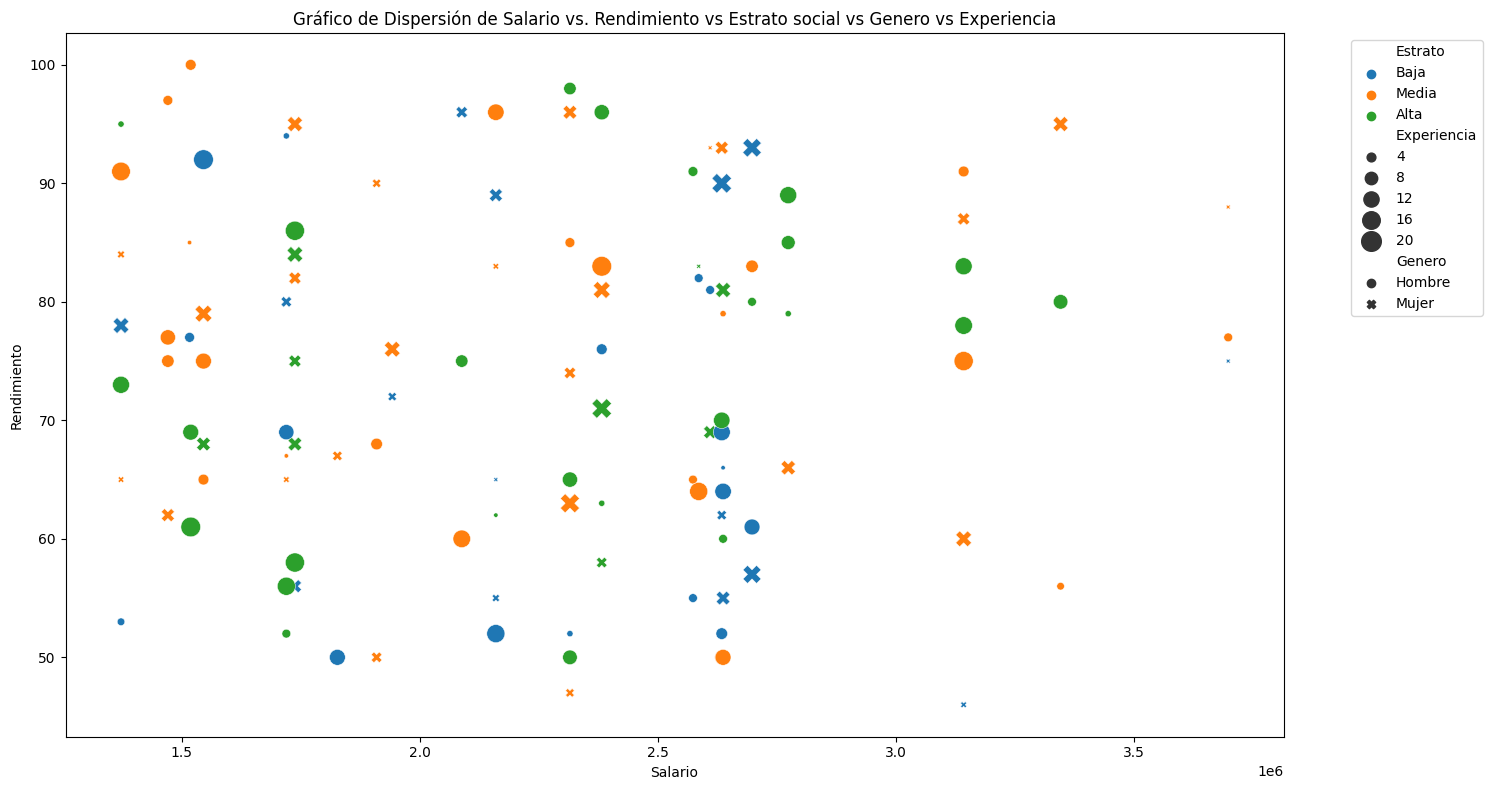

In [13]:
#Indicar cuales son las variables
variable_x = "Salario"
variable_y = "Rendimiento"
subdivision1 = "Estrato"
subdivision2 = "Genero"
variable_size = "Experiencia"
nombre_grafica = "Gráfico de Dispersión de Salario vs. Rendimiento vs Estrato social vs Genero vs Experiencia"

# Gráfico de dispersión de 3 variables (2 numéricas y 2 categorica)
plt.figure(figsize=(15, 8))  # Tamaño
sns.scatterplot(data=datos, x=variable_x, y=variable_y, hue=subdivision1, style=subdivision2, size=variable_size, sizes=(10, 200))  # Generar según variable
plt.title(nombre_grafica)  # título
plt.xlabel(variable_x)  # Eje X
plt.ylabel(variable_y)  # Eje Y
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Ajustar la leyenda
plt.tight_layout()
plt.show()  # mostrar

# **Gráfica de Boxplot**

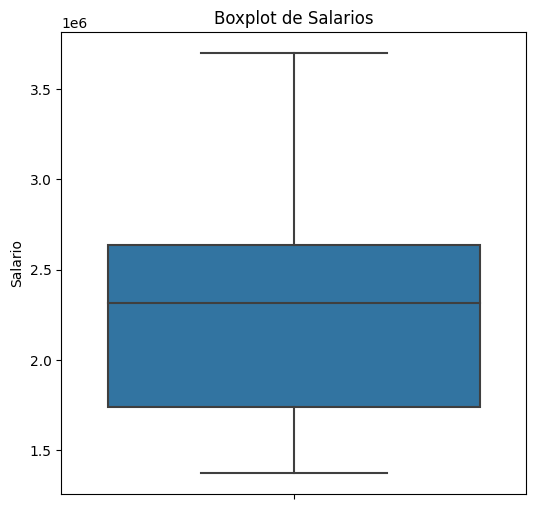

In [14]:
#UNA SOLA VARIABLE

variable_numerica = "Salario"
titulo_grafico = "Boxplot de Salarios"

#Gráfico Boxplot a una sola variable
plt.figure(figsize=(6,6))
sns.boxplot(y=datos[variable_numerica])
plt.title(titulo_grafico)
plt.show()

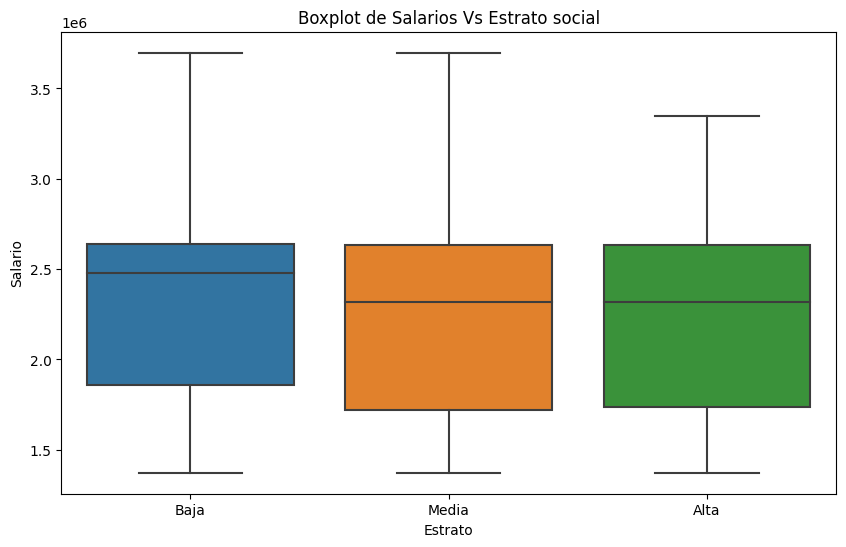

In [15]:
# DOS VARIABLES

variable_numerica = "Salario"
variable_categorica_agrupacion = "Estrato"
titulo_grafico = "Boxplot de Salarios Vs Estrato social"

#Gráfico Boxplot a una sola variable númerica según una categorica
plt.figure(figsize=(10,6))
sns.boxplot(x=variable_categorica_agrupacion, y=variable_numerica, data=datos)
plt.title(titulo_grafico)
plt.show()

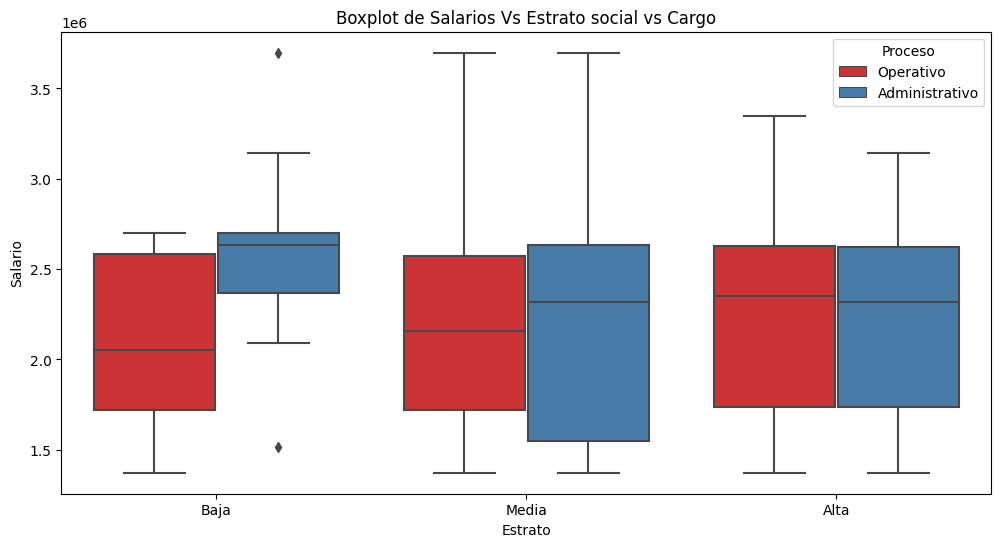

In [16]:
# TRES VARIABLES

variable_numerica = "Salario"
variable_categorica_agrupacion = "Estrato"
variable_categorica_agrupacion2 = "Proceso"
titulo_grafico = "Boxplot de Salarios Vs Estrato social vs Cargo"

#Gráfico Boxplot a una sola variable númerica según dos categorica
plt.figure(figsize=(12,6))
sns.boxplot(x=variable_categorica_agrupacion, y=variable_numerica, hue=variable_categorica_agrupacion2, data=datos, palette="Set1")
plt.title(titulo_grafico)
plt.show()

# **Gráfica de Histograma**

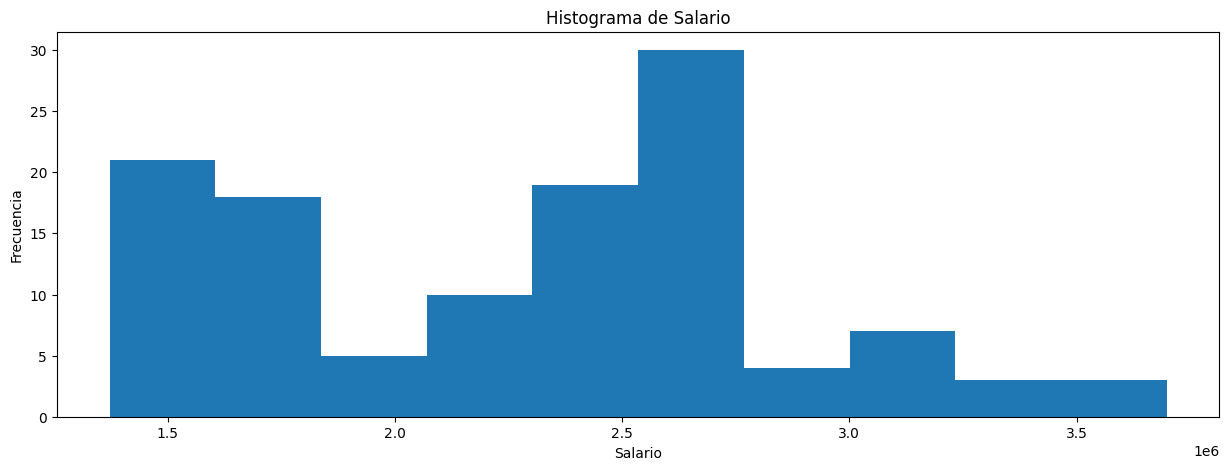

In [17]:
# Histograma básico
variable = "Salario"
titulo = 'Histograma de Salario'

plt.figure(figsize=(15,5))
plt.hist(datos[variable], bins=10)
plt.title(titulo)
plt.xlabel(variable)
plt.ylabel('Frecuencia')
plt.show()

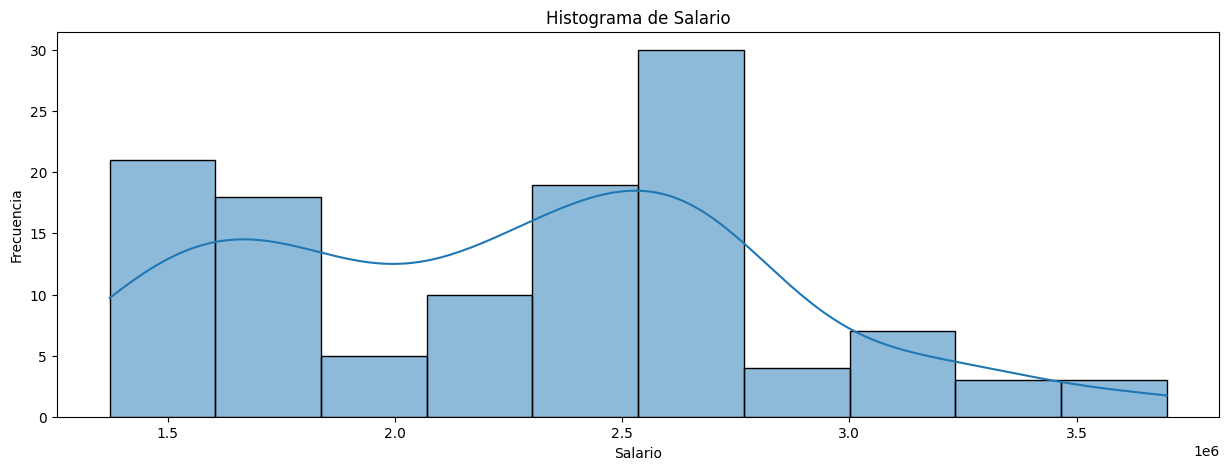

In [18]:
# Histograma básico con curva de normalidad
variable = "Salario"
titulo = 'Histograma de Salario'

plt.figure(figsize=(15,5))
sns.histplot(data=datos, x=variable, kde=True, bins=10)
plt.title(titulo)
plt.xlabel(variable)
plt.ylabel('Frecuencia')
plt.show()

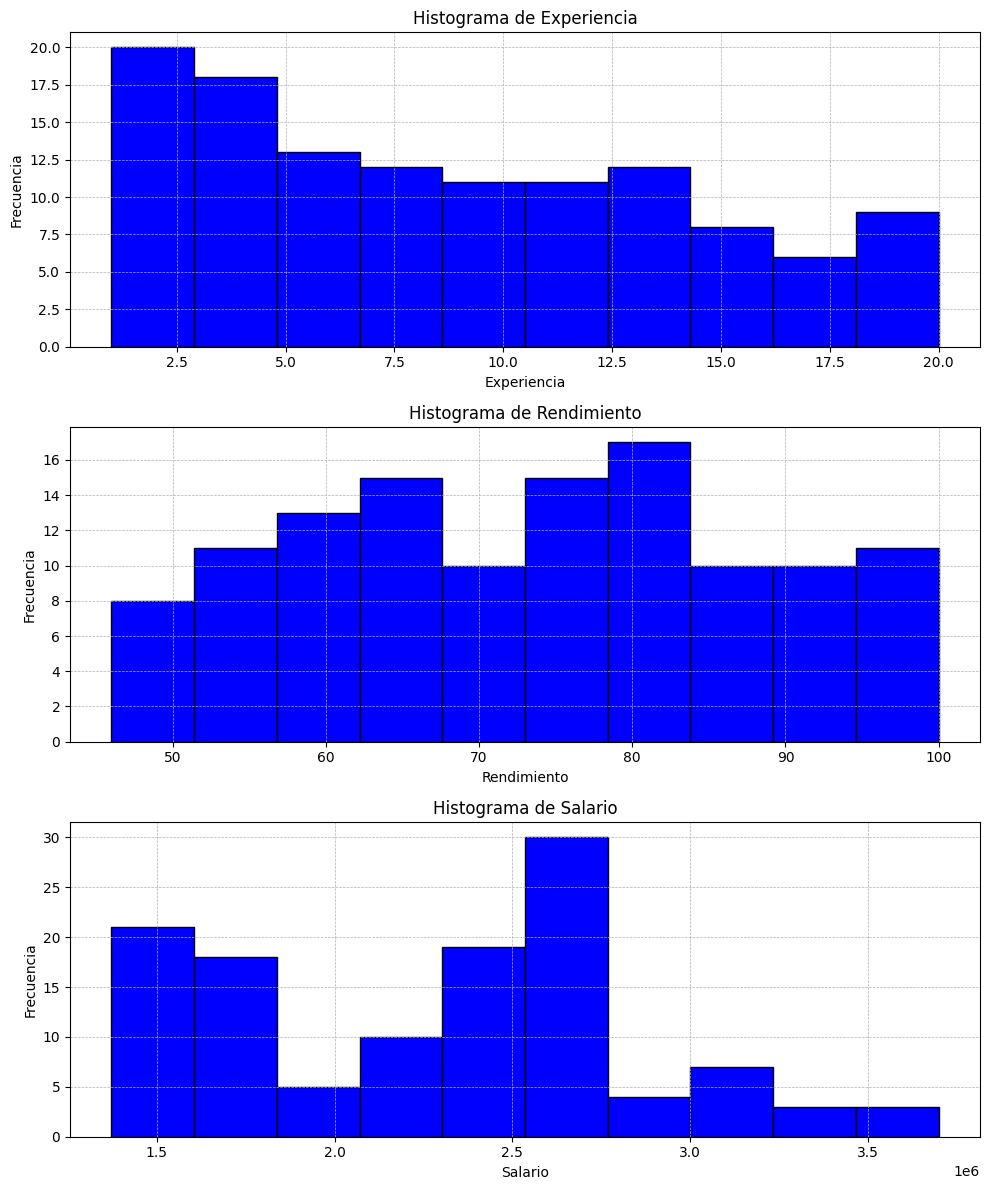

In [19]:
# Seleccionar variables numéricas
numeric_data = datos.select_dtypes(include=['number'])
# Crear subplots para histogramas de las variables numéricas
n_vars = len(numeric_data.columns)
# Crear subplots para histogramas de las variables numéricas usando items() en lugar de iteritems()
fig, axes = plt.subplots(nrows=n_vars, figsize=(10, 4 * n_vars))

for ax, (col_name, col_data) in zip(axes, numeric_data.items()):
    ax.hist(col_data.dropna(), bins=10, color='blue', edgecolor='black')
    ax.set_title(f'Histograma de {col_name}')
    ax.set_xlabel(col_name)
    ax.set_ylabel('Frecuencia')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

# **Gráfico de Violín**

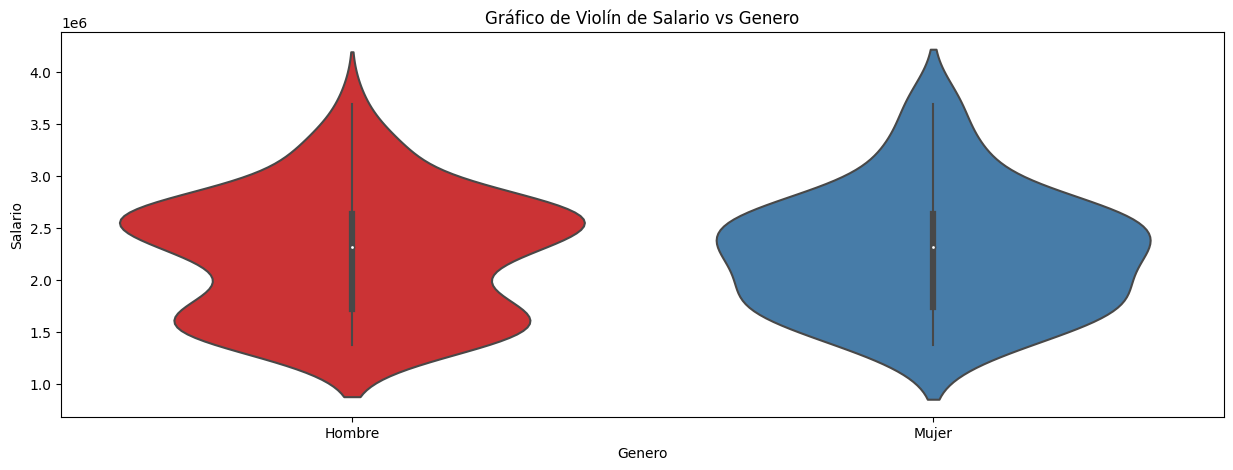

In [20]:
#Gráfico de Violín
plt.figure(figsize=(15,5))
sns.violinplot(data=datos, x='Genero', y='Salario', palette='Set1')
plt.title('Gráfico de Violín de Salario vs Genero')
plt.show()

# **Gráfica de Líneas**

In [21]:
# Importar las librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [22]:
# Cargar datos
datos = pd.read_excel("/content/drive/MyDrive/Python - Google Colaboratory/Curso - Estadística Industrial/datos/datos_poblacion.xlsx")
#datos = pd.read_excel("datos_poblacion.xlsx")
datos.head()

,Año,Aruba,Afganistán,Angola,Albania,Andorra,El mundo árabe,Emiratos Árabes Unidos,Argentina,Armenia,...,Islas Vírgenes (EE.UU.),Viet Nam,Vanuatu,Mundo,Samoa,Kosovo,"Yemen, Rep. del",Sudáfrica,Zambia,Zimbabwe
0,1960,54208,8996967,5454938,1608800,13410,92197715,92417,20481781,1874119,...,32500,32670048,63689,3032156070,108627,947000,5315351,17099836,3070780,3776679
1,1961,55434,9169406,5531451,1659800,14378,94724540,100801,20817270,1941498,...,34300,33666111,65700,3071596055,112112,966000,5393034,17524533,3164330,3905038
2,1962,56234,9351442,5608499,1711319,15379,97334438,112112,21153042,2009524,...,35000,34683410,67793,3124561005,115768,994000,5473671,17965733,3260645,4039209
3,1963,56699,9543200,5679409,1762621,16407,100034191,125130,21488916,2077584,...,39800,35721213,69944,3189655687,119552,1022000,5556767,18423157,3360099,4178726
4,1964,57029,9744772,5734995,1814135,17466,102832792,138049,21824427,2145004,...,40800,36780001,72116,3255145692,123346,1050000,5641598,18896303,3463211,4322854


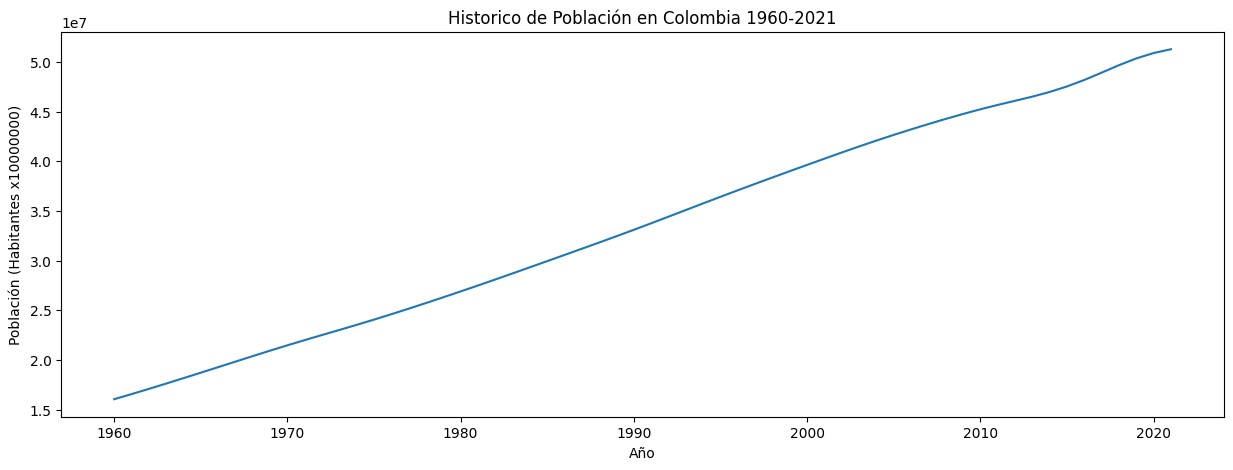

In [23]:
#Ingresar datos de intéres
variable_X = "Colombia"
variable_Y = "Año"
nombre_grafica = "Historico de Población en Colombia 1960-2021"
unidades = "Población (Habitantes x10000000)"

#Grafico de líneas
plt.figure(figsize=(15,5))  #Tamaño de imagen
plt.plot(datos[variable_Y],datos[variable_X]) #Variables a graficar
plt.xlabel(variable_Y) #Titulo de eje X
plt.ylabel(unidades) #Titulo de eje y
plt.title(nombre_grafica) #Titulo grafica
plt.show()  #graficar

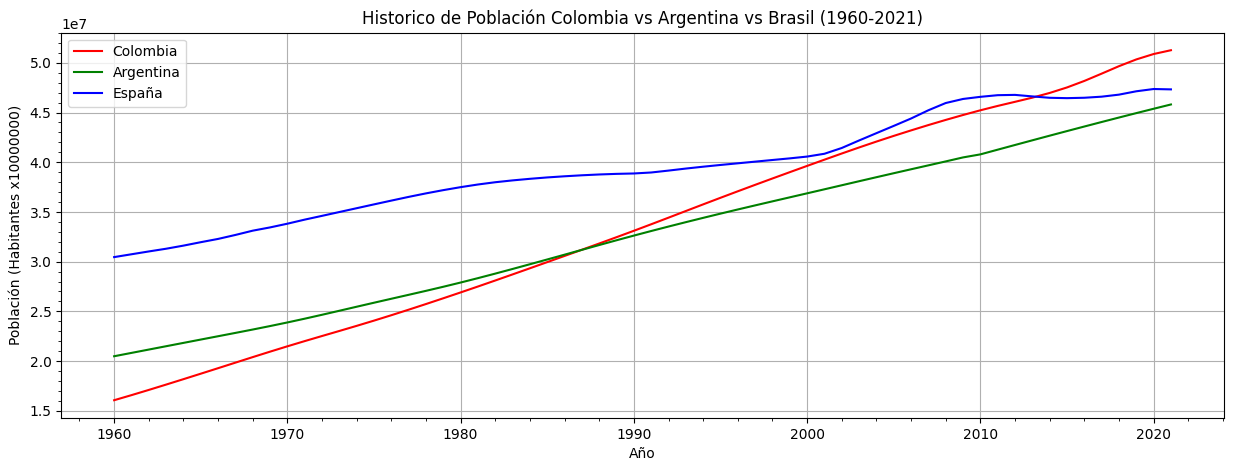

In [24]:
#Ingresar datos de intéres
variable_X1 = "Colombia"
variable_X2 = "Argentina"
variable_X3 = "España"
variable_Y = "Año"
nombre_grafica = "Historico de Población Colombia vs Argentina vs Brasil (1960-2021)"
unidades = "Población (Habitantes x10000000)"

#Grafico de líneas avanzado
plt.figure(figsize=(15,5))  #Tamaño de imagen
plt.plot(datos[variable_Y],datos[variable_X1], color="r",label=variable_X1) #Variables a graficar X1
plt.plot(datos[variable_Y],datos[variable_X2], color="g", label=variable_X2) #Variables a graficar X2
plt.plot(datos[variable_Y],datos[variable_X3], color="b", label=variable_X3) #Variables a graficar X3
plt.xlabel(variable_Y) #Titulo de eje X
plt.ylabel(unidades) #Titulo de eje y
plt.title(nombre_grafica) #Titulo grafica
plt.grid() #Activiar cuadricula
plt.minorticks_on() # Activar marcas menores
plt.legend() #leyenda
plt.show()  #graficar

# **Gráfica mapa de color**

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [26]:
# Cargar datos
datos = pd.read_excel("/content/drive/MyDrive/Python - Google Colaboratory/Curso - Estadística Industrial/datos/datos_ventas.xlsx")

#datos = pd.read_excel("datos_ventas.xlsx")

# mostrar la primera columna como index
datos = datos.set_index('Ventas')
datos.head()

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Ventas,,,,,,,,,,,,
Enero,112,115,145,171,196,204,242,284,315,340,360,417
Febrero,118,126,150,180,196,188,233,277,301,318,342,391
Marzo,132,141,178,193,236,235,267,317,356,362,406,419
Abril,129,135,163,181,235,227,269,313,348,348,396,461
Mayo,121,125,172,183,229,234,270,318,355,363,420,472


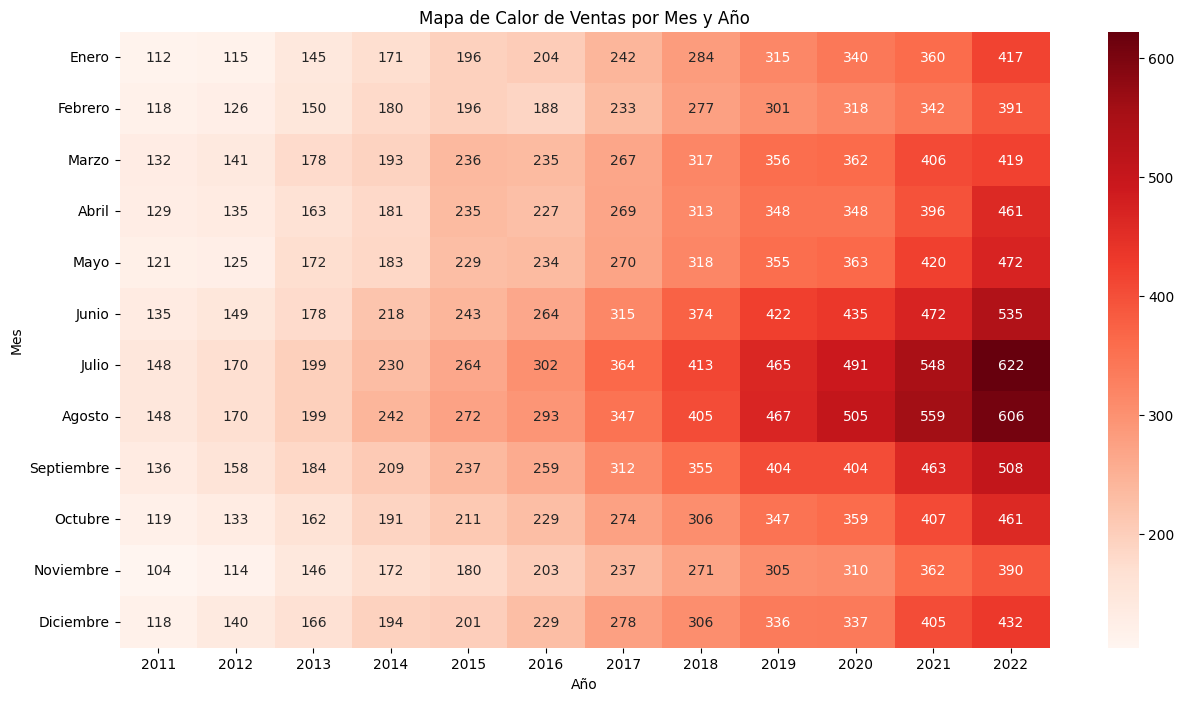

In [27]:
# Creamos el mapa de calor
plt.figure(figsize=(15, 8))
sns.heatmap(datos, cmap="Reds", annot=True,fmt="d")
plt.title('Mapa de Calor de Ventas por Mes y Año')
plt.xlabel('Año')
plt.ylabel('Mes')
plt.show()

# **Gráficos multiples**

In [29]:
#Cargar los dagtos
datos = pd.read_excel("/content/drive/MyDrive/Python - Google Colaboratory/Curso - Estadística Industrial/datos/datos_empresa.xlsx")
#datos = pd.read_excel("datos_empresa.xlsx")
datos.head()

,Genero,Estrato,Proceso,Experiencia,Rendimiento,Salario
0,Hombre,Baja,Operativo,2,94,1720000.0
1,Mujer,Media,Operativo,2,83,2160000.0
2,Hombre,Alta,Operativo,3,82,1738000.0
3,Mujer,Baja,Operativo,5,62,2634400.0
4,Hombre,Media,Administrativo,2,79,2637200.0


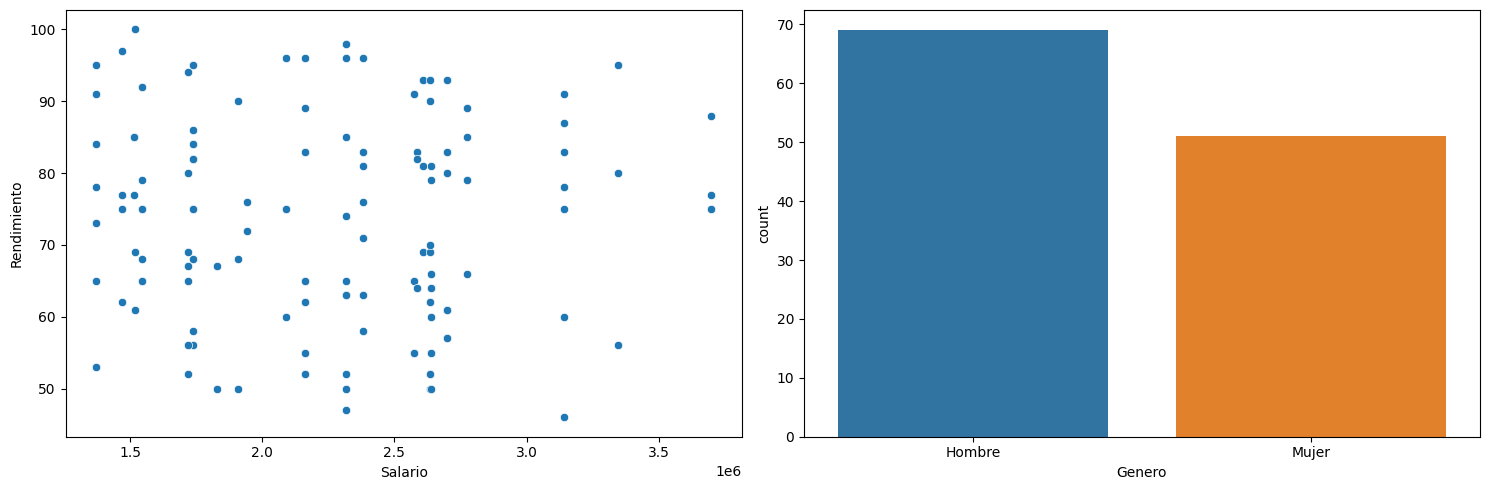

In [30]:
# Crear subplots
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(15, 5))
# Gráfico de dispersión
sns.scatterplot(x='Salario', y='Rendimiento', data=datos, ax=ax[0])
# Gráfico barra
sns.countplot(x='Genero', data=datos, ax=ax[1])
# Ajustar el layout
plt.tight_layout()
plt.show()

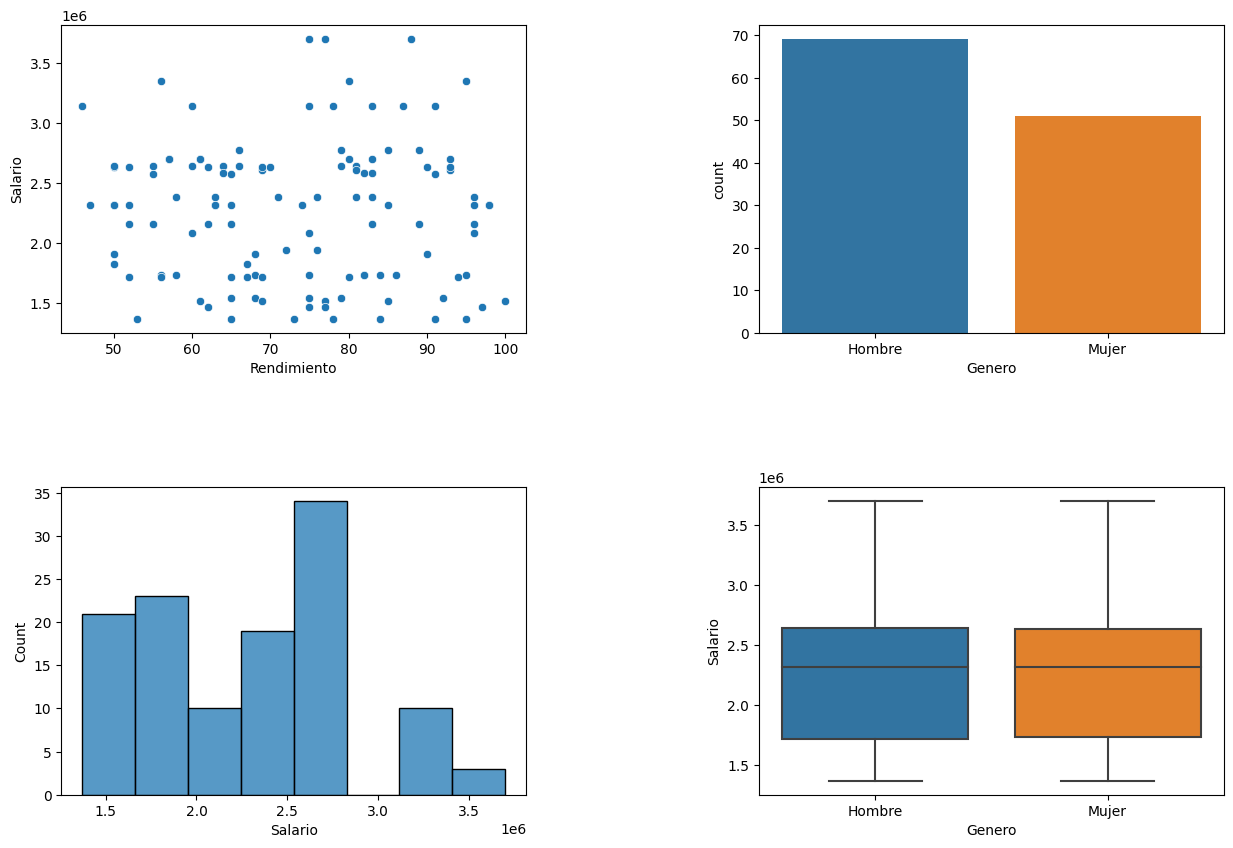

In [31]:
# Crear el subplot con 2 filas y 2 columnas
fig, axs = plt.subplots(2, 2, figsize=(15,10))

# Gráfica 1: Dispersión de Salario ($) y Rendimiento (%)
sns.scatterplot(data=datos, x='Rendimiento', y='Salario', ax=axs[0, 0])
# Gráfica 2: Gráfico de barras de la variable Genero
sns.countplot(data=datos, x='Genero', ax=axs[0, 1])
# Gráfica 3: Histograma de Salario ($)
sns.histplot(data=datos, x='Salario', ax=axs[1, 0])
# Gráfica 4: Boxplot de Salario ($) subdividido por Genero
sns.boxplot(data=datos, x='Genero', y='Salario', ax=axs[1, 1])
# Ajustar el espaciado entre subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)
# Mostrar el subplot
plt.show()